## Load repo & data

In [0]:
import os
from getpass import getpass
user = getpass('GitHub user')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/chengmar09/comp0053.git  

In [0]:
!echo 'Check Current Dir'
%cd /content/comp0053/
%tensorflow_version 1.x
!pwd && ls
!pip install -r Requirement.txt
!pip install h5py

Check Current Dir
/content/comp0053
TensorFlow 1.x selected.
/content/comp0053
comp0053		     Feature_Selection.ipynb  README.md
COMP0053_EmoPain_Demo.ipynb  helper_file.py	      Requirement.txt
data			     __pycache__	      train.py


In [0]:
%cd /content/comp0053/
from helper_file import *
import scipy

movementDataLoader = DataReader('Movementdata') #<- Automatically download data
(train_x, train_y), (valid_x, valid_y) = movementDataLoader.more_more_processing(v_stack=False)

/content/comp0053


Using TensorFlow backend.


Folder exists
Training zip file exists
Validation zip file exists
Train data already exists
Valid data already exists
There is total of 23 training data
There is total of 12 Validation data


## Data overview

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(train_x)

df["label"] = train_y

In [0]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,label
count,356107.000000,356107.000000,356107.000000,356107.000000,356107.000000,356107.000000,356107.000000,356107.000000,356107.000000,356107.000000,356107.000000,356107.000000,356107.000000,3.561070e+05,3.561070e+05,3.561070e+05,3.561070e+05,3.561070e+05,3.561070e+05,3.561070e+05,3.561070e+05,3.561070e+05,3.561070e+05,3.561070e+05,3.561070e+05,3.561070e+05,356107.000000
mean,0.952268,0.928118,0.798099,0.779434,0.711192,0.718786,0.896356,0.852837,0.854941,0.911996,0.681498,0.668392,1.033264,5.154226e-04,5.020096e-04,4.886417e-04,4.826325e-04,2.168602e-03,1.993863e-03,3.753961e-04,4.753972e-04,5.125240e-05,4.747113e-05,9.197391e-05,6.311789e-05,1.886003e-04,0.186958
std,0.187462,0.188372,0.273835,0.282729,0.406892,0.384622,0.197154,0.208463,0.176257,0.159150,0.267465,0.267381,0.111155,5.525390e-03,6.114523e-03,5.655140e-03,5.437230e-03,2.280314e-02,2.186506e-02,7.504816e-03,6.751071e-03,2.040167e-03,3.546128e-03,1.481085e-03,1.229087e-03,5.500361e-03,0.389878
min,0.000396,0.000216,0.000008,0.000037,0.000009,0.000003,0.000268,0.000121,0.001187,0.000432,0.121558,0.085805,0.030491,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.838834,0.808746,0.600912,0.540192,0.224158,0.292111,0.865704,0.796507,0.733398,0.850076,0.479826,0.420159,0.974517,6.250154e-09,5.805532e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.747429e-14,3.664229e-09,1.598159e-09,9.500013e-10,1.422455e-09,8.245424e-10,2.346607e-08,0.000000
50%,1.016306,1.003566,0.928233,0.914754,0.926128,0.922203,0.946114,0.923331,0.840381,0.930840,0.670756,0.687594,1.060195,2.994538e-07,2.627966e-07,6.489996e-08,6.375985e-08,9.036092e-08,7.011083e-08,9.406188e-08,4.150412e-07,1.802178e-07,1.464050e-07,1.410244e-07,9.279364e-08,7.634352e-07,0.000000
75%,1.077136,1.059666,1.000262,0.985784,1.027157,1.019511,1.017850,0.977869,0.992124,1.015170,0.866199,0.837262,1.116095,1.024592e-05,9.492237e-06,4.998426e-06,5.105633e-06,7.869434e-06,7.700831e-06,6.668309e-06,1.245195e-05,3.169694e-06,2.788677e-06,3.884226e-06,2.582332e-06,1.480800e-05,0.000000
max,1.307089,1.305928,1.240060,1.250638,1.306171,1.308452,1.308903,1.304998,1.232563,1.234635,1.604144,1.647279,1.738558,7.652384e-01,1.560405e+00,7.734986e-01,9.797010e-01,1.792610e+00,1.749172e+00,1.553122e+00,1.437819e+00,8.755652e-01,1.627883e+00,3.774386e-01,5.828800e-01,1.630808e+00,1.000000


In [0]:
df["label"].value_counts()

0.0    289530
1.0     66577
Name: label, dtype: int64

## Sampling

In the training data approximately 18% is labeled 1. A simple way to tackle this imbalance would be to sample from the training set, instead of using all of the data.

## Feature Distributions

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

Below the distribution for all the individual features are plotted.

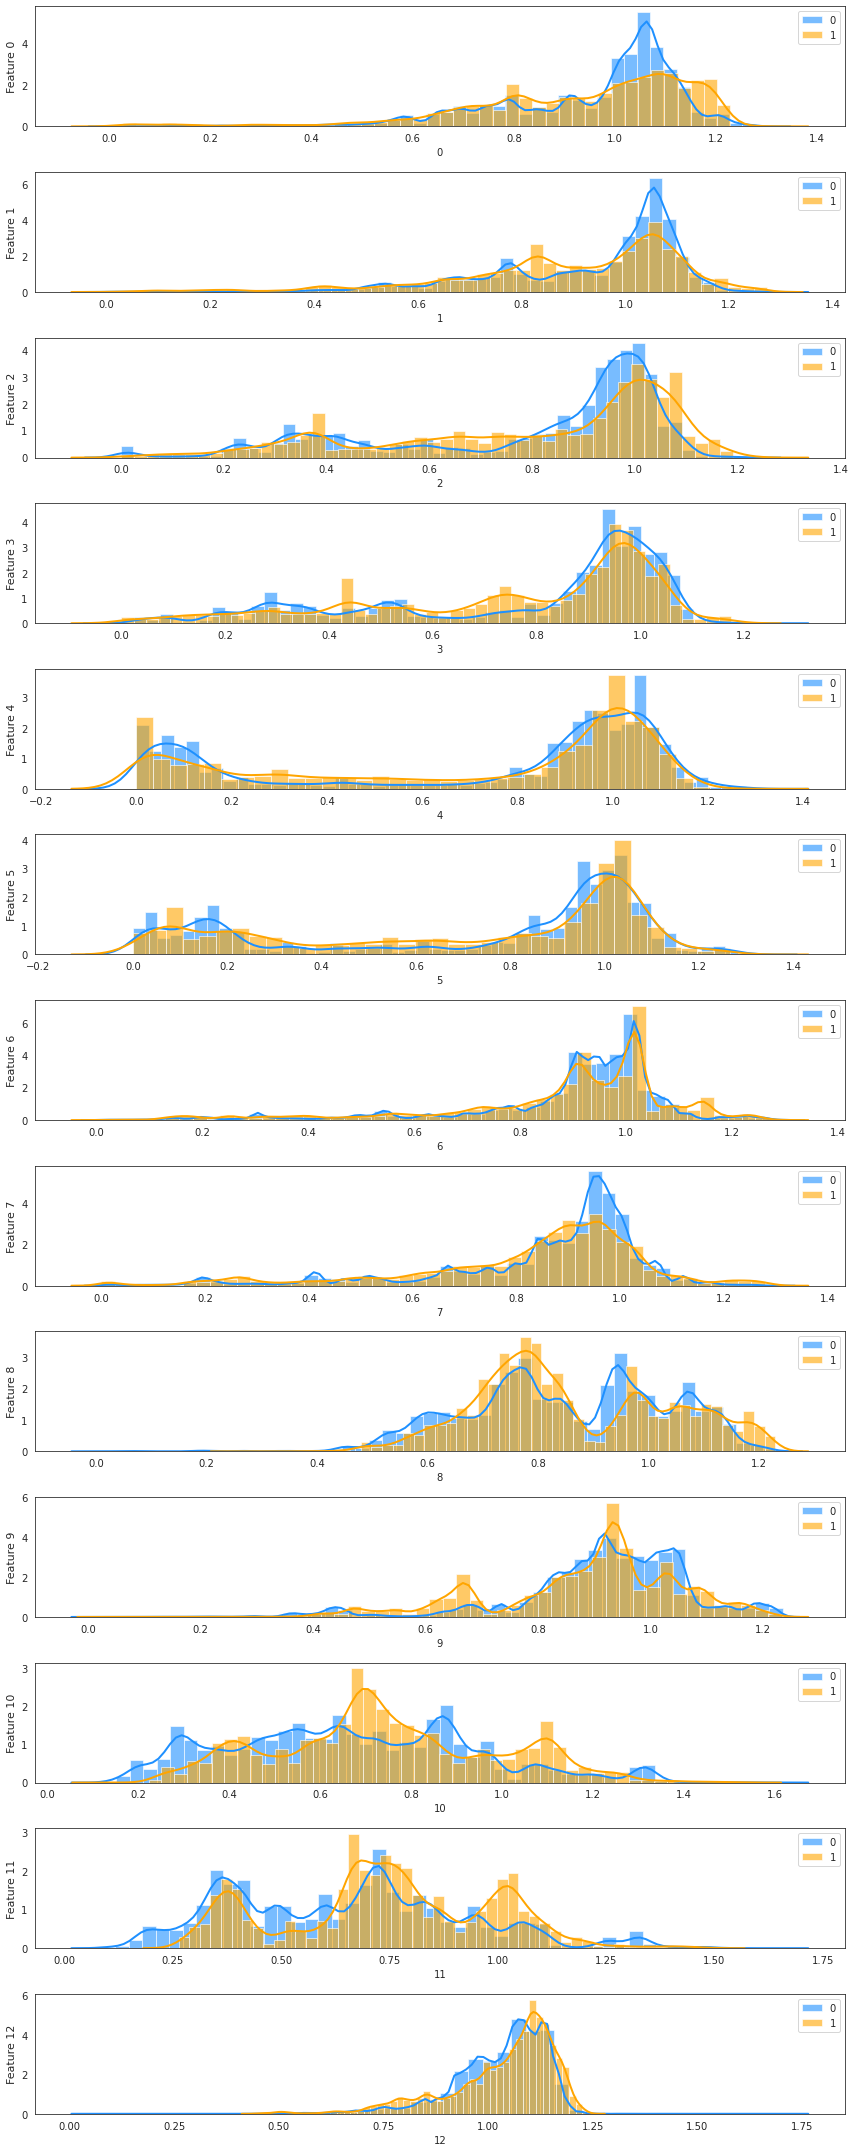

In [0]:
num_features = 13
fig, axs = plt.subplots(num_features, figsize=(12,30))

for i in range(num_features):
    label_0 = df[df.label == 0][i]
    label_1 = df[df.label == 1][i]

    # https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/
    kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
    sns.distplot(label_0, color="dodgerblue", label="0", ax=axs[i], **kwargs)
    sns.distplot(label_1, color="orange", label="1", ax=axs[i], **kwargs)
    axs[i].legend()
    axs[i].set_ylabel("Feature {}".format(i), size=11)

fig.tight_layout()

## Generate data from multivariate Gaussian

We can try to replicate one of the features by using a Multivariate Guassian distribution.

- https://github.com/sdv-dev/Copulas
- https://sdv-dev.github.io/Copulas/tutorials/04_Syntehtic_Data_for_Machine_Learning.html#Generating-synthetic-data

In [0]:
!pip install copulas

In [0]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from copulas.multivariate import GaussianMultivariate

In [0]:
# try on small sample of dataset (colab crash because not enough ram otherwise)
dataset = np.concatenate([train_x[:, 0, None], train_y], axis=1)

#filter by positive samples
dataset = dataset[dataset[:, 1] == 1]

dataset = dataset[:10000, :]
dataset.shape

(10000, 2)

In [0]:
# Fit a gaussian copula to the data
copula = GaussianMultivariate()
copula.fit(dataset)

In [0]:
# Sample synthetic data
synthetic_data = copula.sample(1000)

synthetic_x = synthetic_data.values[:, :-1]
synthetic_y = synthetic_data.values[:, -1]

In [0]:
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt

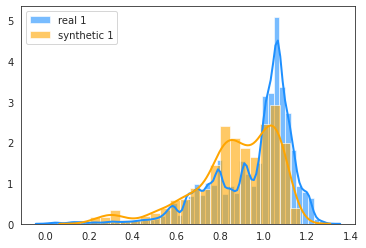

In [0]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(train_x[:, 0, None], color="dodgerblue", label="real 1", **kwargs)
sns.distplot(synthetic_x, color="orange", label="synthetic 1", **kwargs)
plt.legend()

## Generate data from GANs

- https://github.com/sdv-dev/CTGAN 


In [0]:
!pip install ctgan

In [0]:
from ctgan import CTGANSynthesizer

In [0]:
ctgan = CTGANSynthesizer()
ctgan.fit(dataset, ["feature 0", "label"])

Epoch 1, Loss G: -0.5269, Loss D: -0.1752
Epoch 2, Loss G: -1.2130, Loss D: -1.5354
Epoch 3, Loss G: -1.9429, Loss D: -1.4668
Epoch 4, Loss G: -2.4291, Loss D: -2.5162
Epoch 5, Loss G: -2.5740, Loss D: -2.5355
Epoch 6, Loss G: -2.8120, Loss D: -2.7789
Epoch 7, Loss G: -2.8389, Loss D: -3.1002
Epoch 8, Loss G: -2.6599, Loss D: -3.0114
Epoch 9, Loss G: -2.6432, Loss D: -3.0473
Epoch 10, Loss G: -2.5051, Loss D: -3.0584
Epoch 11, Loss G: -2.3652, Loss D: -3.2994
Epoch 12, Loss G: -2.6089, Loss D: -3.3519
Epoch 13, Loss G: -2.4996, Loss D: -3.7568
Epoch 14, Loss G: -2.4712, Loss D: -3.4973
Epoch 15, Loss G: -2.2679, Loss D: -3.7561
Epoch 16, Loss G: -2.4877, Loss D: -3.7508
Epoch 17, Loss G: -2.1487, Loss D: -3.9863
Epoch 18, Loss G: -2.2076, Loss D: -3.9682
Epoch 19, Loss G: -2.1781, Loss D: -3.8107
Epoch 20, Loss G: -2.0401, Loss D: -4.2549
Epoch 21, Loss G: -1.9910, Loss D: -4.1860
Epoch 22, Loss G: -1.9432, Loss D: -4.4940
Epoch 23, Loss G: -2.0264, Loss D: -4.4126
Epoch 24, Loss G: -2

In [0]:
samples = ctgan.sample(100)

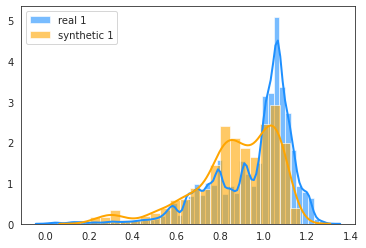

In [0]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(train_x[:, 0, None], color="dodgerblue", label="real 1", **kwargs)
sns.distplot(synthetic_x, color="orange", label="synthetic 1", **kwargs)
plt.legend()

## Training

For training, initially 10000 samples.